<a href="https://colab.research.google.com/github/LucasGleysson/Estatistica_DS_ML/blob/master/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/csv_result-ebay_confianca_completo.csv')
display(data.head())
display(data.shape)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


(5806, 75)

In [3]:
data['blacklist'].replace(['N','B'], [0 , 1], inplace=True)

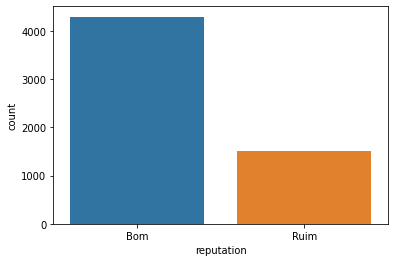

In [4]:
sns.countplot(x=data['reputation']);

#Decision Tree Classifier

              precision    recall  f1-score   support

         Bom       0.77      0.76      0.77       860
        Ruim       0.34      0.35      0.35       302

    accuracy                           0.65      1162
   macro avg       0.56      0.56      0.56      1162
weighted avg       0.66      0.65      0.66      1162



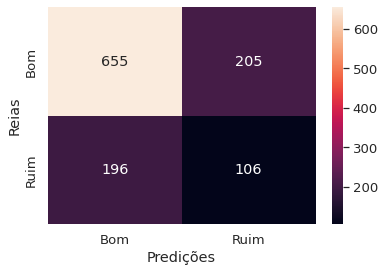

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

x = data.drop(columns='reputation')
y = data['reputation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)


print(classification_report(y_test,previsoes))
cm = confusion_matrix(y_test,previsoes)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, annot=True, fmt='.3g', xticklabels=['Bom', 'Ruim'], yticklabels=['Bom', 'Ruim']);
ax.set(xlabel='Predições', ylabel='Reias');

#Undersampling

              precision    recall  f1-score   support

         Bom       0.94      0.96      0.95       782
        Ruim       0.89      0.85      0.87       302

    accuracy                           0.93      1084
   macro avg       0.92      0.91      0.91      1084
weighted avg       0.93      0.93      0.93      1084



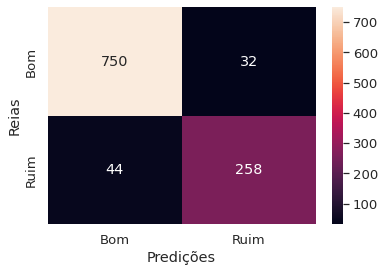

In [6]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x,y)

x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under,
                                                                            test_size=0.2, stratify=y_under)

modelo_under = DecisionTreeClassifier()
modelo_under.fit(x_train_under, y_train_under)

previsoes_under = modelo.predict(x_test_under)

print(classification_report(y_test_under, previsoes_under))
cm_under = confusion_matrix(y_test_under, previsoes_under)
ax = sns.heatmap(cm_under, annot=True, fmt='.3g', xticklabels=['Bom', 'Ruim'], yticklabels=['Bom', 'Ruim']);
ax.set(xlabel='Predições', ylabel='Reias');

# Oversampling

              precision    recall  f1-score   support

         Bom       0.68      0.64      0.66      1290
        Ruim       0.66      0.69      0.68      1290

    accuracy                           0.67      2580
   macro avg       0.67      0.67      0.67      2580
weighted avg       0.67      0.67      0.67      2580



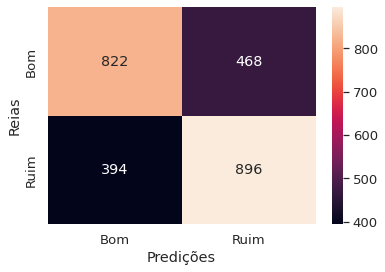

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
x_over, y_over = sm.fit_resample(x,y)

x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(x_over, y_over,
                                                                        test_size = 0.3, stratify=y_over)

modelo_over = DecisionTreeClassifier()
modelo_over.fit(x_train_over, y_train_over)

previsoes_over = modelo_over.predict(x_test_over)

print(classification_report(y_test_over, previsoes_over))
cm_over = confusion_matrix(y_test_over, previsoes_over) 
ax = sns.heatmap(cm_over, annot=True, fmt='.3g', xticklabels=['Bom', 'Ruim'], yticklabels=['Bom', 'Ruim']);
ax.set(xlabel='Predições', ylabel='Reias');